# Pruebas paso por paso del nuevo módulo sobre imágenes grandes

In [1]:
#Imports
 
from skimage import io
from skimage.color import rgb2grey
from skimage import exposure
from skimage.restoration import denoise_tv_chambolle
from _frangi import frangi, hessian
from skimage.filters import threshold_li
from skimage import morphology
from skimage.morphology import skeletonize
import warnings as war
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


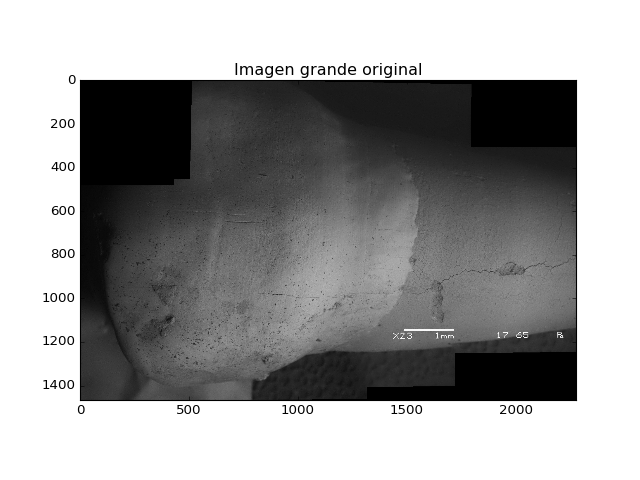

In [2]:
#Importar imágen grande original 
path = 'Images\\FullImages\\Full_Image.png'
img = io.imread(path)
plt.figure();
plt.title('Imagen grande original')
plt.imshow(img, cmap='gray');

### Convert image to grey scale

<IPython.core.display.Javascript object>


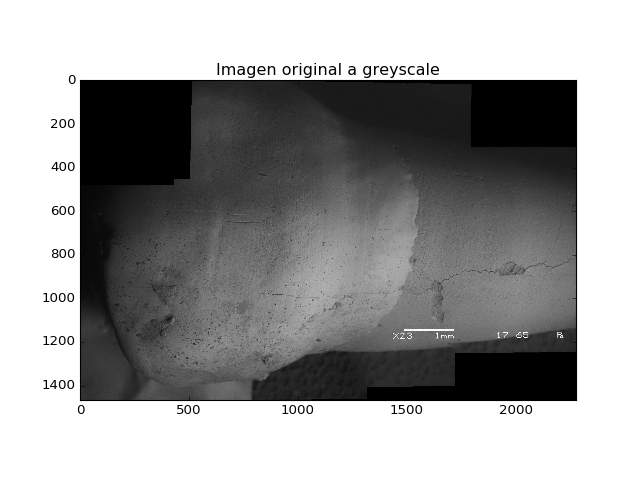

In [3]:
img = rgb2grey(img)
plt.figure();
plt.title('Imagen original a greyscale')
plt.imshow(img, cmap='gray');

### Equalize histogram

E:\Andres\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


<IPython.core.display.Javascript object>


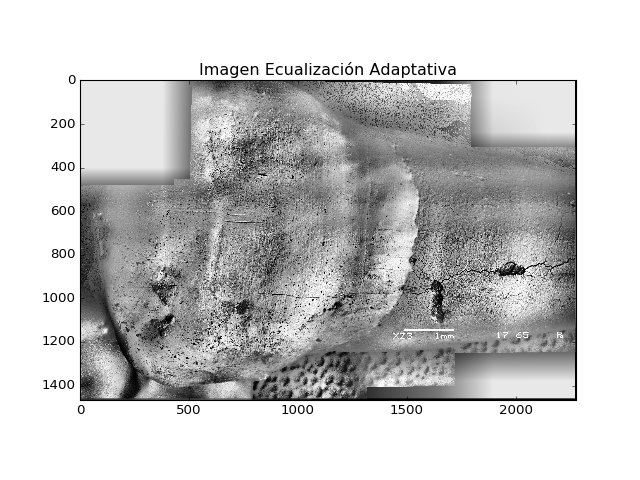

In [4]:
imgAdapted = exposure.equalize_adapthist(img, clip_limit=0.91, nbins=100)
plt.figure();
plt.title('Imagen Ecualización Adaptativa')
plt.imshow(imgAdapted, cmap='gray');

### Reduce noise

<IPython.core.display.Javascript object>


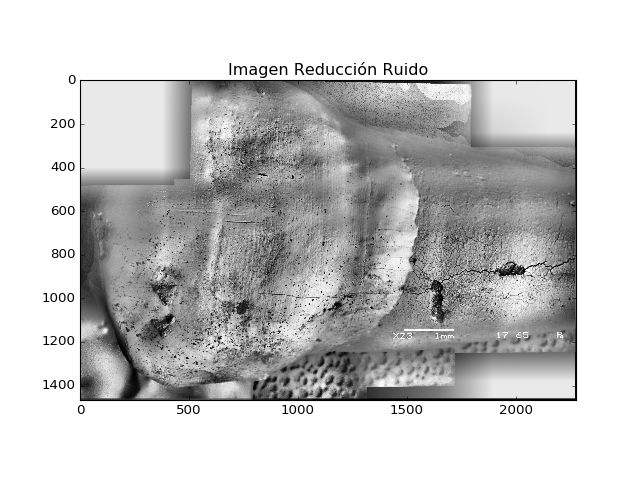

In [5]:
imgAdaptedDenoise = denoise_tv_chambolle(imgAdapted, weight=0.1)
plt.figure();
plt.title('Imagen Reducción Ruido')
plt.imshow(imgAdaptedDenoise, cmap='gray');

### Apply frangi filter

<IPython.core.display.Javascript object>


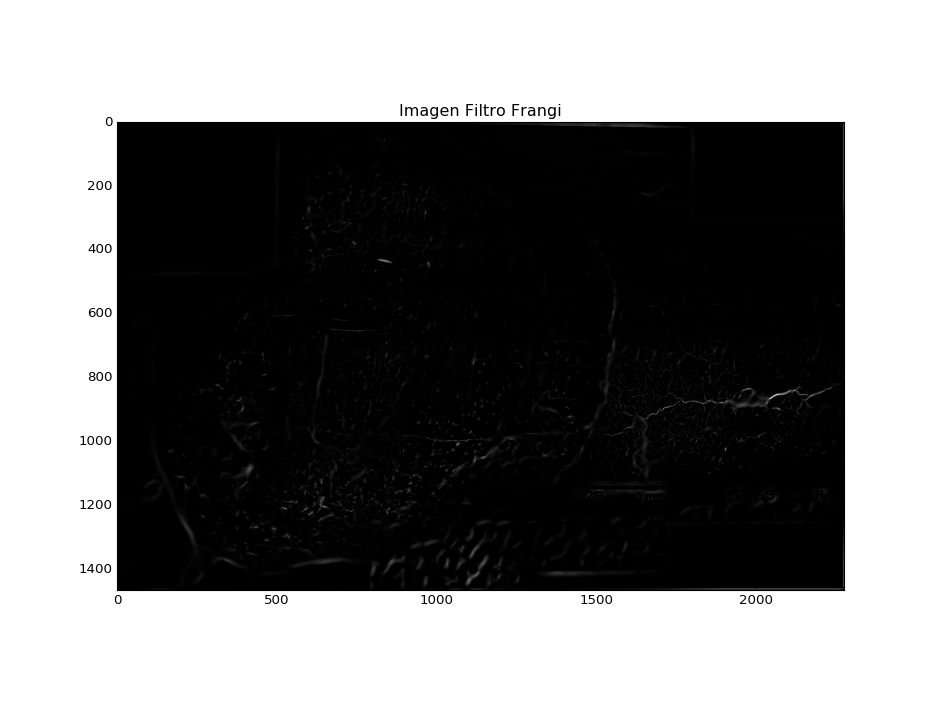

In [6]:
frangiImg = frangi(imgAdaptedDenoise)
plt.figure();
plt.title('Imagen Filtro Frangi')
plt.imshow(frangiImg, cmap='gray');

### Threshold operations

<IPython.core.display.Javascript object>


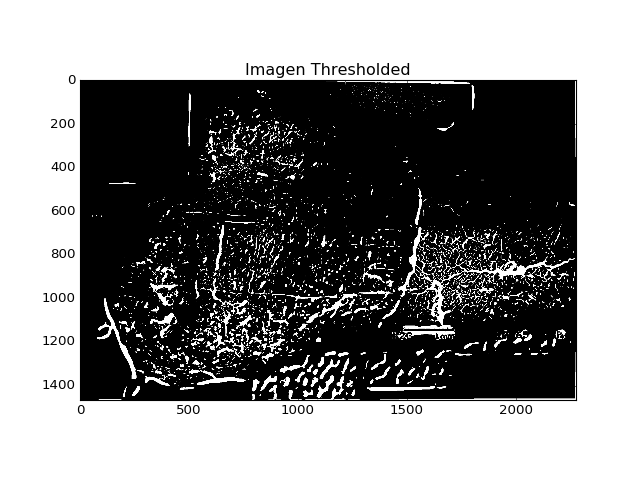

In [7]:
# Calculate image threshold
threshold = threshold_li(frangiImg)
# Apply threshold
thresholdedImg = frangiImg >= threshold
plt.figure();
plt.title('Imagen Thresholded')
plt.imshow(thresholdedImg, cmap='gray');

### Skeletonize image

<IPython.core.display.Javascript object>


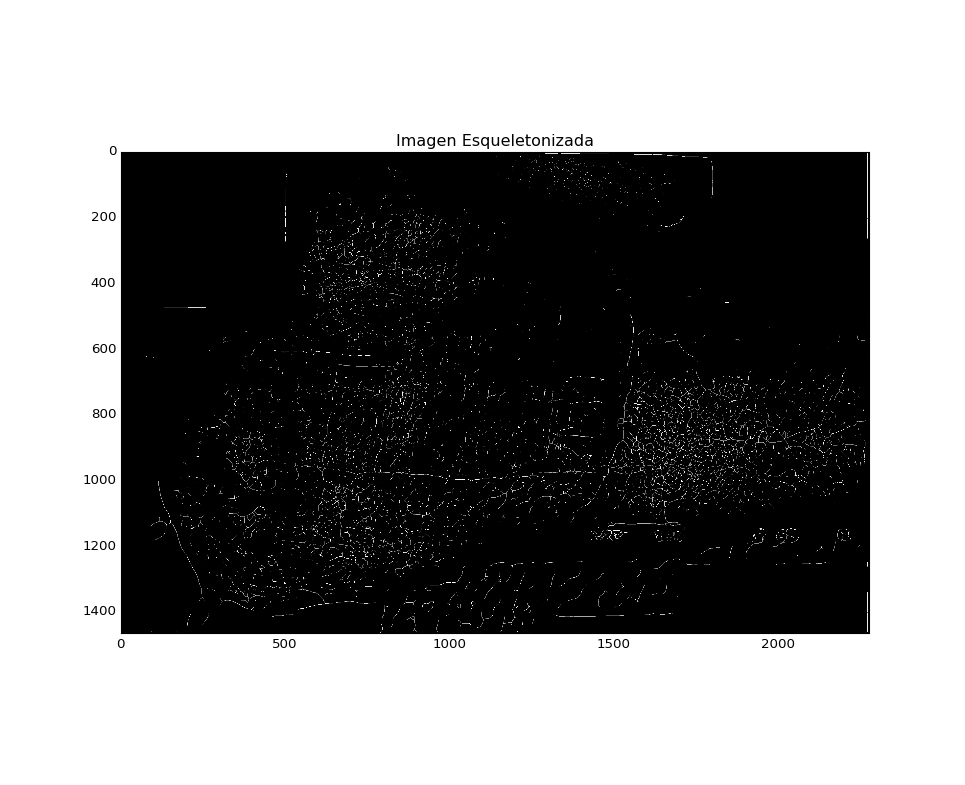

In [8]:
skeletonizeImg = skeletonize(thresholdedImg)
plt.figure();
plt.title('Imagen Esqueletonizada')
plt.imshow(skeletonizeImg, cmap='gray');

### Remove small objects

In [9]:
def remove_small(skImg, removeSmall):
    # (min_size fixed to 70)
    result = morphology.remove_small_objects(skImg, min_size=removeSmall, connectivity=100)
    plt.figure();
    plt.title('Imagen sin objetos pequeños');
    plt.imshow(result, cmap='gray');

<IPython.core.display.Javascript object>


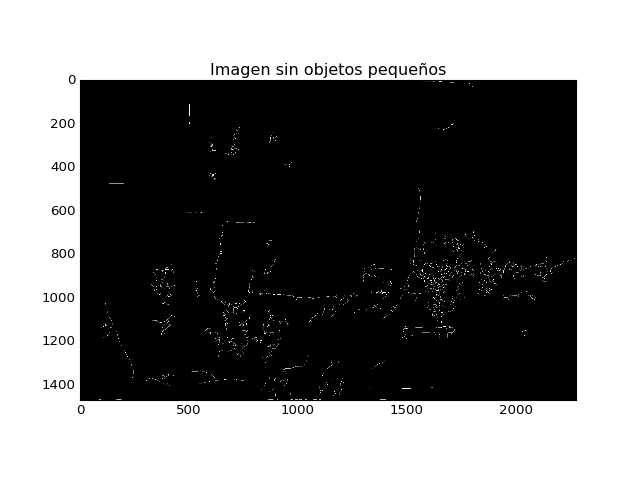

In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(remove_small, skImg=fixed(skeletonizeImg), removeSmall=(0,100))

### Resultados
Con imágenes grandes, no es satisfactorio usar Frangi